# Importing Libraries

In [ ]:
import pandas as pd
import numpy as np
import math
import matplotlib.pyplot as plt
import time
from roucy_dumpfileparser import *
import log_parser
import time
import itertools
from pandas.plotting import register_matplotlib_converters
%matplotlib inline

In [4]:
# seed='uncoated2'
# upper_half='for_area_upper_half_uncoated_seed2' ### probably better to just bring the main dumpfile

# file_disquare='di_sqr_uncoated2_new' ### for di parameter
# logfile='log_uncoated_seed2.Pt_shape' ### for getting the force and the lower layers position for strain
# dislocation='dislocation_count_uncoated2'
# dislocation_lengthdislocation_count/n_'

# Naming Variables

In [5]:
seed='coated1'
upper_half='for_area_upper_half_seed1' ### probably better to just bring the main dumpfile

file_disquare='di_square_seed1' ### for di parameter
logfile='log_seed1.Pt_shape' ### for getting the force and the lower layers position for strain
dislocation='dislocation_count_seed1'
dislocation_length='dislocation_length_seed1'

## Need to calculate the top layer for coated one,

## if its uncoated type has to be 1

## for coated type has to be 3

In [ ]:
pt=0
timestep = getfirsttimestep(upper_half) # initial timestep
dumpfreq = 2500   # corresponds to the dump frequency value used in the simulation
runtime  = 10000000 # corresponds to the run time used to make the dumpfile
# runtime  = 2500 # corresponds to the run time used to make the dumpfile



ave_top_pt_z_coord=[]

while timestep <= runtime:
    data, pt = parsedumpfile(upper_half, pt)
    selected_keys=['type', 'z']
    data_two_column={key: data[key] for key in selected_keys}
    df = pd.DataFrame(data_two_column)
    pt_df = df[df['type'] == 1]
    sorted_pt_df = pt_df.sort_values('z', ascending=False)
    top_20_z = sorted_pt_df.iloc[5:20]['z']
    avg_top_20_z = top_20_z.mean()
#     print(avg_top_20_z, timestep/2500, 'timestep')
    ave_top_pt_z_coord.append(avg_top_20_z)

    
    timestep += dumpfreq # update timestep
# print(ave_top_pt_z_coord)    

### """As this code are taking too much time, its better you save the output right a way to save time"""

In [7]:
locals()[f"average_top_layer_{seed}"]=ave_top_pt_z_coord
with open('avergae_top_layer_{}.txt'.format(seed), 'w') as f:
    for item in ave_top_pt_z_coord:
        f.write(str(item) + '\n')


In [8]:
ave_top_pt_z_coord=[]

with open('avergae_top_layer_coated1.txt', 'r') as f:
    my_list = [float(line.strip(',')) for line in f]
    for i in my_list:
        ave_top_pt_z_coord.append(i)
        
# print(ave_top_pt_z_coord)


## Calculation of top or middle area for atomic method stress


## For middle area, I am getting the range from the dump file in ovito

## For the top area using the average top area position

## Be careful about the atom type, in uncoated Pt is type 1, and coated Pt is type 3, so change everytime 


In [ ]:
pt=0
timestep = getfirsttimestep(upper_half) # initial timestep
dumpfreq = 2500   # corresponds to the dump frequency value used in the simulation
runtime  = 10000000 # corresponds to the run time used to make the dumpfile
# runtime  = 2500 # corresponds to the run time used to make the dumpfile

area_si=(3.1415)*1.11**2
area_pt=(3.1415)*1.39**2
area_o=(3.1415)*.73**2

area=[]

while timestep <= runtime:
#     print(timestep,'sdfd')
    data, pt = parsedumpfile(upper_half, pt)
    z_axis=data['z']
    types=data['type']
    total_Si=[]
    total_O=[]
    total_Pt=[]
    count=len(total_O)+len(total_Pt)+len(total_Si)
    verify_o_axis=[]
    v=int(timestep/2500)
    top_range=ave_top_pt_z_coord[v]+.5
    low_range=ave_top_pt_z_coord[v]-.5
    print(top_range,'top range',low_range,'low range')
    for i in z_axis:
        if top_range>i>low_range:

#         if -.7>i>-2.6:
            
            indices=z_axis.index(i)
            what_type=types[indices]
            
            if what_type==1:
                total_O.append(what_type)
                
            if what_type==2:
                total_Si.append(what_type)
                
            if what_type==3:
                total_Pt.append(what_type)
                
                
    count_O=len(total_O)
#     print(timestep,'timestep')
#     print(count_O, "O")
    count_Pt=len(total_Pt)
#     print(count_Pt, "Pt")
    count_Si=len(total_Si)
#     print(count_Si, "Si")
    total_area= (count_O*area_o)+(count_Pt*area_pt)+(count_Si*area_si)
#     print(total_area, 'Å square')
    area.append(total_area)
    
    
    
    timestep += dumpfreq # update timestep 
# print(area)   

## As this code is still little manual interms of manual input of coating, uncoating's atom 
## type, middle area, and multiple variables


In [ ]:
locals()[f"area_{seed}_top"]=area
# print(locals()[f"area_{seed}_top"])

# locals()[f"area_{seed}_middle"]=area
# print(area_coated1_middle)

In [191]:
with open('avergae_middle_area_{}.txt'.format(seed), 'w') as f:
    for item in area:
        f.write(str(item) + '\n')


In [203]:
with open('avergae_top_area_{}.txt'.format(seed), 'w') as f:
    for item in area:
        f.write(str(item) + '\n')


### Usually for uncoated we could just calculate the strain (top, bottom z position from log file)
### But in coated we had to go through extra process of calculating the average top position
### now I will be using to calculate the strain
### Lowest position can be found from log file as thosse atoms are frozen

In [ ]:
thermo_log=log_parser.thermo_dict(logfile,1)
minimum_z=thermo_log['c_2[3]']
lowest_z=float(min(minimum_z))
print(lowest_z, 'lowest position')
initial_top=float(ave_top_pt_z_coord[0])
print(initial_top, 'average position of top layer')

original_length=initial_top-lowest_z
print(original_length,'originial length')

displacement_z=[]
for x in ave_top_pt_z_coord:
    new_length=float(x)-lowest_z
    disp=(original_length-new_length)/original_length
    displacement_z.append(disp)
    
# print(displacement_z, 'displacement')

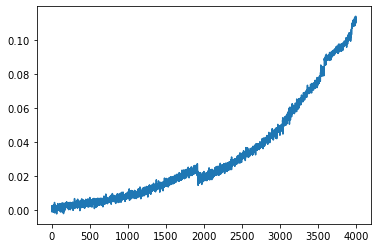

In [124]:
locals()[f"displacement_{seed}"]=displacement_z
plt.plot(locals()[f"displacement_{seed}"])

### Need to convert the force to nN

### lammps metal unit give force in ev/Å; to convert it to nN, 1.602 multiplication needed

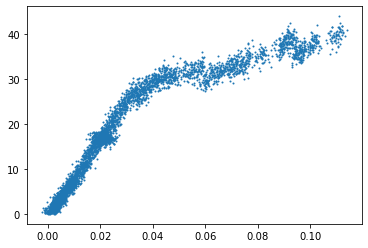

In [125]:
locals()[f"force_{seed}_top"]=thermo_log['f_printforce']
converted_force=[x*1.602 for x in locals()[f"force_{seed}_top"]]
plt.scatter(displacement_z,converted_force,label='coated 300 K',s=1)

## Again need to save these force  in vairables

In [127]:
locals()[f"converted_force_{seed}"]=converted_force

with open('converted_force_{}.txt'.format(seed), 'w') as f:
    for item in converted_force_coated1:
        f.write(str(item) + '\n')

### if confusion about unit
### follow this link http://greif.geo.berkeley.edu/~driver/conversions.html
### from force to stress, we did already changed eV/Å to nN/Å now

In [208]:
locals()[f"y_stress_top_{seed}"]=[]
for i in range(len(locals()[f"converted_force_{seed}"])):
    stressed=(locals()[f"converted_force_{seed}"][i]/locals()[f"area_{seed}_top"][i])*100
    locals()[f"y_stress_top_{seed}"].append(stressed)

In [192]:
locals()[f"y_stress_middle_{seed}"]=[]
for i in range(len(locals()[f"converted_force_{seed}"])):
    stressed=(locals()[f"converted_force_{seed}"][i]/locals()[f"area_{seed}_middle"][i])*100
    locals()[f"y_stress_middle_{seed}"].append(stressed)
    

In [205]:
with open('stress_top_{}.txt'.format(seed), 'w') as f:
    for item in y_stress_top_coated1:
        f.write(str(item) + '\n')

In [198]:
# locals()[f"converted_force_{seed}"]=converted_force

with open('stress_middle_{}.txt'.format(seed), 'w') as f:
    for item in y_stress_middle_coated1:
        f.write(str(item) + '\n')

# plot force vs strain

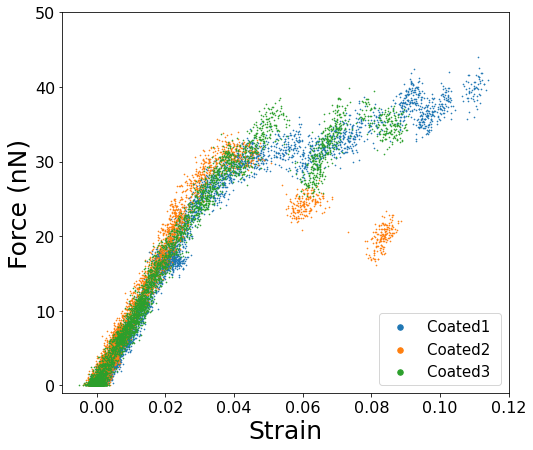

In [313]:

# x=displacement_coated1[1000:2500]
# y1=cumulative_sum[1000:2500]
# y2=di_sqr[1000:2500]

x1=displacement_coated1
x2=displacement_coated2
x3=displacement_coated3
xun=displacement_uncoated

y1=converted_force_coated1
y2=converted_force_coated2
y3=converted_force_coated3
yun=converted_force_uncoated


plt.figure(figsize=(8,7))

# plt.title("Coated",fontsize=20)
plt.scatter(x1,y1,label='{} '.format('Coated1'),s=.4)
plt.scatter(x2,y2,label='{} '.format('Coated2'),s=.4)
plt.scatter(x3,y3,label='{} '.format('Coated3'),s=.4)
# plt.scatter(xun,yun,label='{} '.format('Uncoated'),s=.4)

# plt.scatter(xun,yun_stress_middle_correct,label='{} '.format('atomic area method'),s=.4,c='#008000')
# plt.scatter(xun,yun_stress_top_correct,label='{} '.format(seedun),s=.4,c='#008000')
# plt.scatter(xun,yun_stress_middle,label='{} '.format('convex hull'),s=.4,)
# plt.scatter(xun,y1_stress_top,label='{} '.format(seed1),s=.4,c='#008000')

# plt.title('Uncoated vs Coated (top area)',fontsize=25)
plt.xlabel('Strain',fontsize=25)
plt.ylabel("Force (nN)",fontsize=25)
plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.ylim([-1,50])
plt.xlim(-.01,.12)

lgnd = plt.legend(loc="lower right", scatterpoints=1, fontsize=15)

lgnd.legendHandles[0]._sizes = [30]
lgnd.legendHandles[1]._sizes = [30]
lgnd.legendHandles[2]._sizes = [30]
# lgnd.legendHandles[3]._sizes = [30]
# plt.savefig("stress_vs_strain_middle_coated123",dpi=300, bbox_inches='tight')
plt.savefig("for qual paper1",dpi=300, bbox_inches='tight')

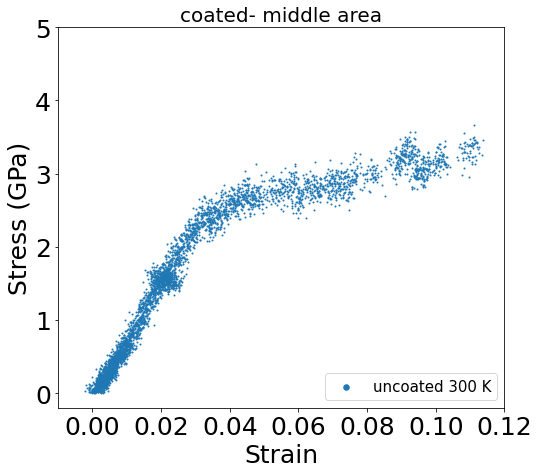

In [16]:
plt.figure(figsize=(8,7))

plt.title("coated- middle area",fontsize=20)

plt.scatter(displacement_z,locals()[f"y_stress_top_{seed}"],label='uncoated 300 K',s=1)

plt.xlabel('Strain',fontsize=25)
plt.ylabel("Stress (GPa)",fontsize=25)
plt.xticks(fontsize=25)
plt.yticks(fontsize=25)
plt.ylim([-0.2,5])
plt.xlim(-.01,.12)

lgnd = plt.legend(loc="lower right", scatterpoints=1, fontsize=15)

lgnd.legendHandles[0]._sizes = [30]
# lgnd.legendHandles[1]._sizes = [30]
# lgnd.legendHandles[2]._sizes = [30]
# lgnd.legendHandles[3]._sizes = [30]

# plt.savefig("example2",dpi=300, bbox_inches='tight')

# alculate Di square

In [13]:
pt=0
timestep = getfirsttimestep(file_disquare) # initial timestep
dumpfreq = 2500   # corresponds to the dump frequency value used in the simulation
runtime  = 10000000 # corresponds to the run time used to make the dumpfile
time2=[]
di_sqr=[]

start_time = time.time()


while timestep <= runtime:
    data, pt = parsedumpfile(file_disquare, pt)
    time2.append(timestep)
    di_sqr.append(np.average(data['NonaffineSquaredDisplacement']))
    
    end_time = time.time()
    elapsed_time = end_time - start_time
#     print(timestep)
#     print('Elapsed time at iteration', i, ': ', elapsed_time)
    
    timestep += dumpfreq # update timestep 
    
# print(data.keys())
# print(time2)
# print(di_sqr)

In [508]:
locals()[f"disqaure_{seed}"]=di_sqr


In [131]:
with open('converted_disqr_{}.txt'.format(seed), 'w') as f:
    for item in di_sqr:
        f.write(str(item) + '\n')

In [172]:
cumulative_disqr=list(itertools.accumulate(di_sqr))

y3=cumulative_disqr

### Cumulative Dislocations

In [498]:
dislocation='dislocation_count_seed1_smallpart'

In [149]:
df=pd.read_csv('dislocation_count_seed1_smallpart',header=None,names=['dislocation-count'])
dislocation_count=df['dislocation-count'].to_list()

cumulative_sum = list(itertools.accumulate(dislocation_count))
print(len(cumulative_sum))
# plt.plot(displacement_coated1[1:],cumulative_sum)

4000


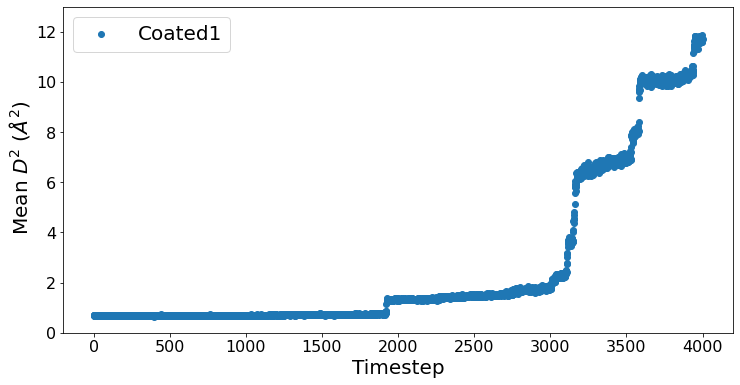

In [144]:
# total_length=df_u['total_length']
x1=list(np.linspace(1,4000,4000))


plt.figure(figsize=(12, 6))


plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Timestep',fontsize=20)
plt.ylabel(' Mean $ D^{2}$ $(Å^{2}) $',fontsize=20)

plt.ylim(0,13)
plt.scatter(x1[1:],di_sqr[2:],label='Coated1')
plt.legend(fontsize=20)
plt.savefig('qual9_disqaure_{}.jpg'.format(seed),dpi=300, bbox_inches='tight')

## Dislocations lengths

In [25]:
col=[ 'frame','timestep','volume', 'BCC_counts','cubic_diamond','FCC_counts' ,'HCP_counts','Other_counts','hexadiamond', 'total_length']
# # col=[ 'BCC_counts','cubic', 'FCC_counts' , 'HCP_counts','Other_counts','total_length','timestep']
# col=[ 'frame','Timestep','total_length']
# df_u=pd.read_csv(dislocation_length,skiprows=1,delimiter=' ',header=None, names=col,index_col=False)
# total_length=df_u['total_length']
df_u=pd.read_csv('dislocation_uncoated',skiprows=1,delimiter=' ',header=None, names=col,index_col=False)
df_u

,frame,timestep,volume,BCC_counts,cubic_diamond,FCC_counts,HCP_counts,Other_counts,hexadiamond,total_length
0,0,0,428376.750073,0,0,1289,0,0,636,0.000000
1,1,2500,428376.750073,0,0,1287,0,0,638,0.000000
2,2,5000,428376.750073,0,0,1289,0,0,636,0.000000
3,3,7500,428376.750073,0,0,1289,0,0,636,0.000000
4,4,10000,428376.750073,0,0,1286,0,0,639,0.000000
...,...,...,...,...,...,...,...,...,...,...
3996,3996,9990000,428376.750073,0,0,1217,18,0,690,33.723643
3997,3997,9992500,428376.750073,0,0,1195,16,0,714,33.353007
3998,3998,9995000,428376.750073,0,0,1214,9,0,702,29.397332
3999,3999,9997500,428376.750073,0,0,1210,7,0,708,15.644924


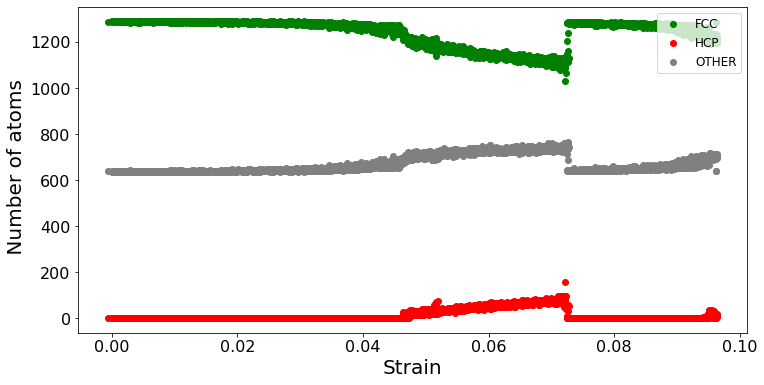

In [63]:
plt.figure(figsize=(12, 6))
fcc=df_u['FCC_counts']
hcp=df_u['HCP_counts']
other=df_u['hexadiamond']
plt.scatter(displacement_z[:],fcc[:],label='FCC',c='green')
plt.scatter(displacement_z[:],hcp[:],label='HCP',c='red')
plt.scatter(displacement_z[:],other[:],label='OTHER',c='grey')

plt.xticks(fontsize=16)
plt.yticks(fontsize=16)
plt.xlabel('Strain',fontsize=20)
plt.ylabel(' Number of atoms',fontsize=20)
plt.legend(loc="best", scatterpoints=1, fontsize=12)
plt.savefig('qual6_{}.jpg'.format(seed),dpi=300, bbox_inches='tight')

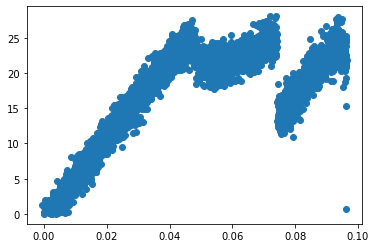

In [46]:
plt.scatter(displacement_z[:],converted_force[:])

## Index of the dislocation length which surpasses the cutoff

In [185]:
threshold_value = 40
index_dislocation_length = []

for i in range(len(total_length)):
    if total_length[i] > threshold_value:
        index_dislocation_length.append(i)
    else:
        index_dislocation_length.append(0)

print(len(index_dislocation_length))

4001


In [ ]:
new_total_length=[]
for i in index_dislocation_length:
    if i==0:
        new_total_length.append(0)
    else:
        new_total_length.append(total_length[i])
# print(new_total_length)
    

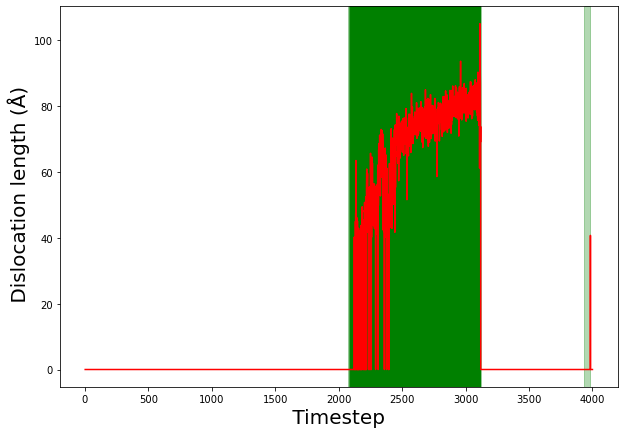

In [194]:
# fig,ax1=plt.subplots(figsize=(10,7))

range_size = 50

# Create a new figure
fig, ax = plt.subplots(figsize=(10,7))

# Plot the curve
# ax.plot(x1, y2[1:], color='red')
ax.plot(x1, new_total_length[:], color='red')

# Loop through the indices and highlight the corresponding range in green
for i in index_dislocation_length:
    if i != 0:
        ax.axvspan(x1[i-range_size], x1[i], alpha=.3, color='green')

# Show the plot
ax.set_ylabel(' Dislocation length (Å)' ,fontsize=20,color='black')
ax.set_xlabel(' Timestep ' ,fontsize=20,color='black')



# plt.savefig('1uncoated_dislocation_part_all_part_cumulative_dislocation_vs_di_square_{}.jpg'.format(seed),dpi=300, bbox_inches='tight')

plt.show()

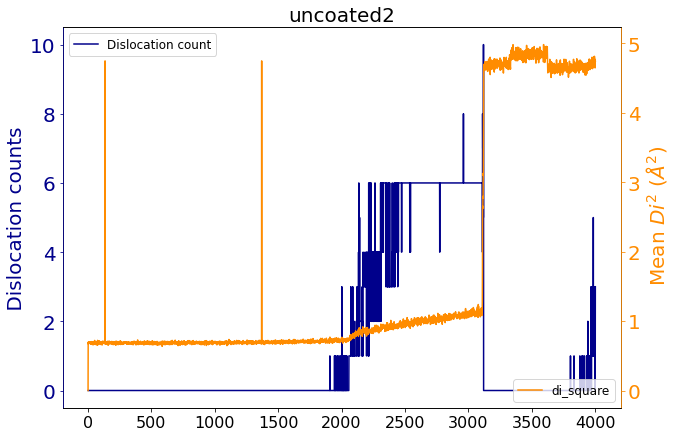

In [525]:

# x=displacement_coated1[1000:2500]
# y1=cumulative_sum[1000:2500]
# y2=di_sqr[1000:2500]

x=displacement_coated1
x1=list(np.linspace(1,4001,4001))
# x11=x1[1920:1950]
y1=cumulative_sum
y2=di_sqr


fig,ax1=plt.subplots(figsize=(10,7))
ax2=ax1.twinx()

# plt.plot(x1[1850:1950],total_length[1850:1950])
# curve1=ax1.scatter(x1[1850:1950],total_length[1850:1950],label='Dislocation length',color='darkblue',s=16)
curve1=ax1.plot(x1[1:],dislocation_count[:],label='Dislocation count',color='darkblue')
curve2=ax2.plot(x1[:],di_sqr[:],label='di_square',color='darkorange')
# curve2=ax2.scatter(x1[1850:1950],y3[1850:1950],label='di_square',color='darkorange',s=16)
ax1.set_ylabel(' Dislocation counts ' ,fontsize=20,color='darkblue')
ax2.set_ylabel(' Mean $ Di^{2}$ $(Å^{2}) $',fontsize=20,color='darkorange')


ax1.tick_params(axis='y', colors='darkblue', labelsize=20)
ax2.tick_params(axis='y', colors='darkorange',labelsize=20)



# ax1.set_yticklabels(np.arange(0, 222, 1), fontsize=20, color='blue')

# ax2.set_yticklabels(np.arange(0, 222, 1), fontsize=20, color='orange')


ax2.spines['left'].set_color('darkblue') 
ax2.spines['right'].set_color('darkorange') 

ax1.legend(loc='upper left',fontsize=12)
ax2.legend(loc='lower right',fontsize=12)
ax1.tick_params(axis='x', labelsize=16)
plt.title(seed,fontsize=20)



# Plot legend.
lgnd1 = ax1.legend(loc="upper left", scatterpoints=1, fontsize=12)
lgnd1.legendHandles[0]._sizes = [30]

lgnd2 = ax2.legend(loc="lower right", scatterpoints=1, fontsize=12)
lgnd2.legendHandles[0]._sizes = [30]
# plt.xlabel('timestep')
# lgnd.legendHandles[1]._sizes = [30]

# plt.savefig('uncoated2_cumulative_dislocation_vs_di_square_{}.jpg'.format(seed),dpi=300, bbox_inches='tight')


MovieWriter imagemagick unavailable; using Pillow instead.


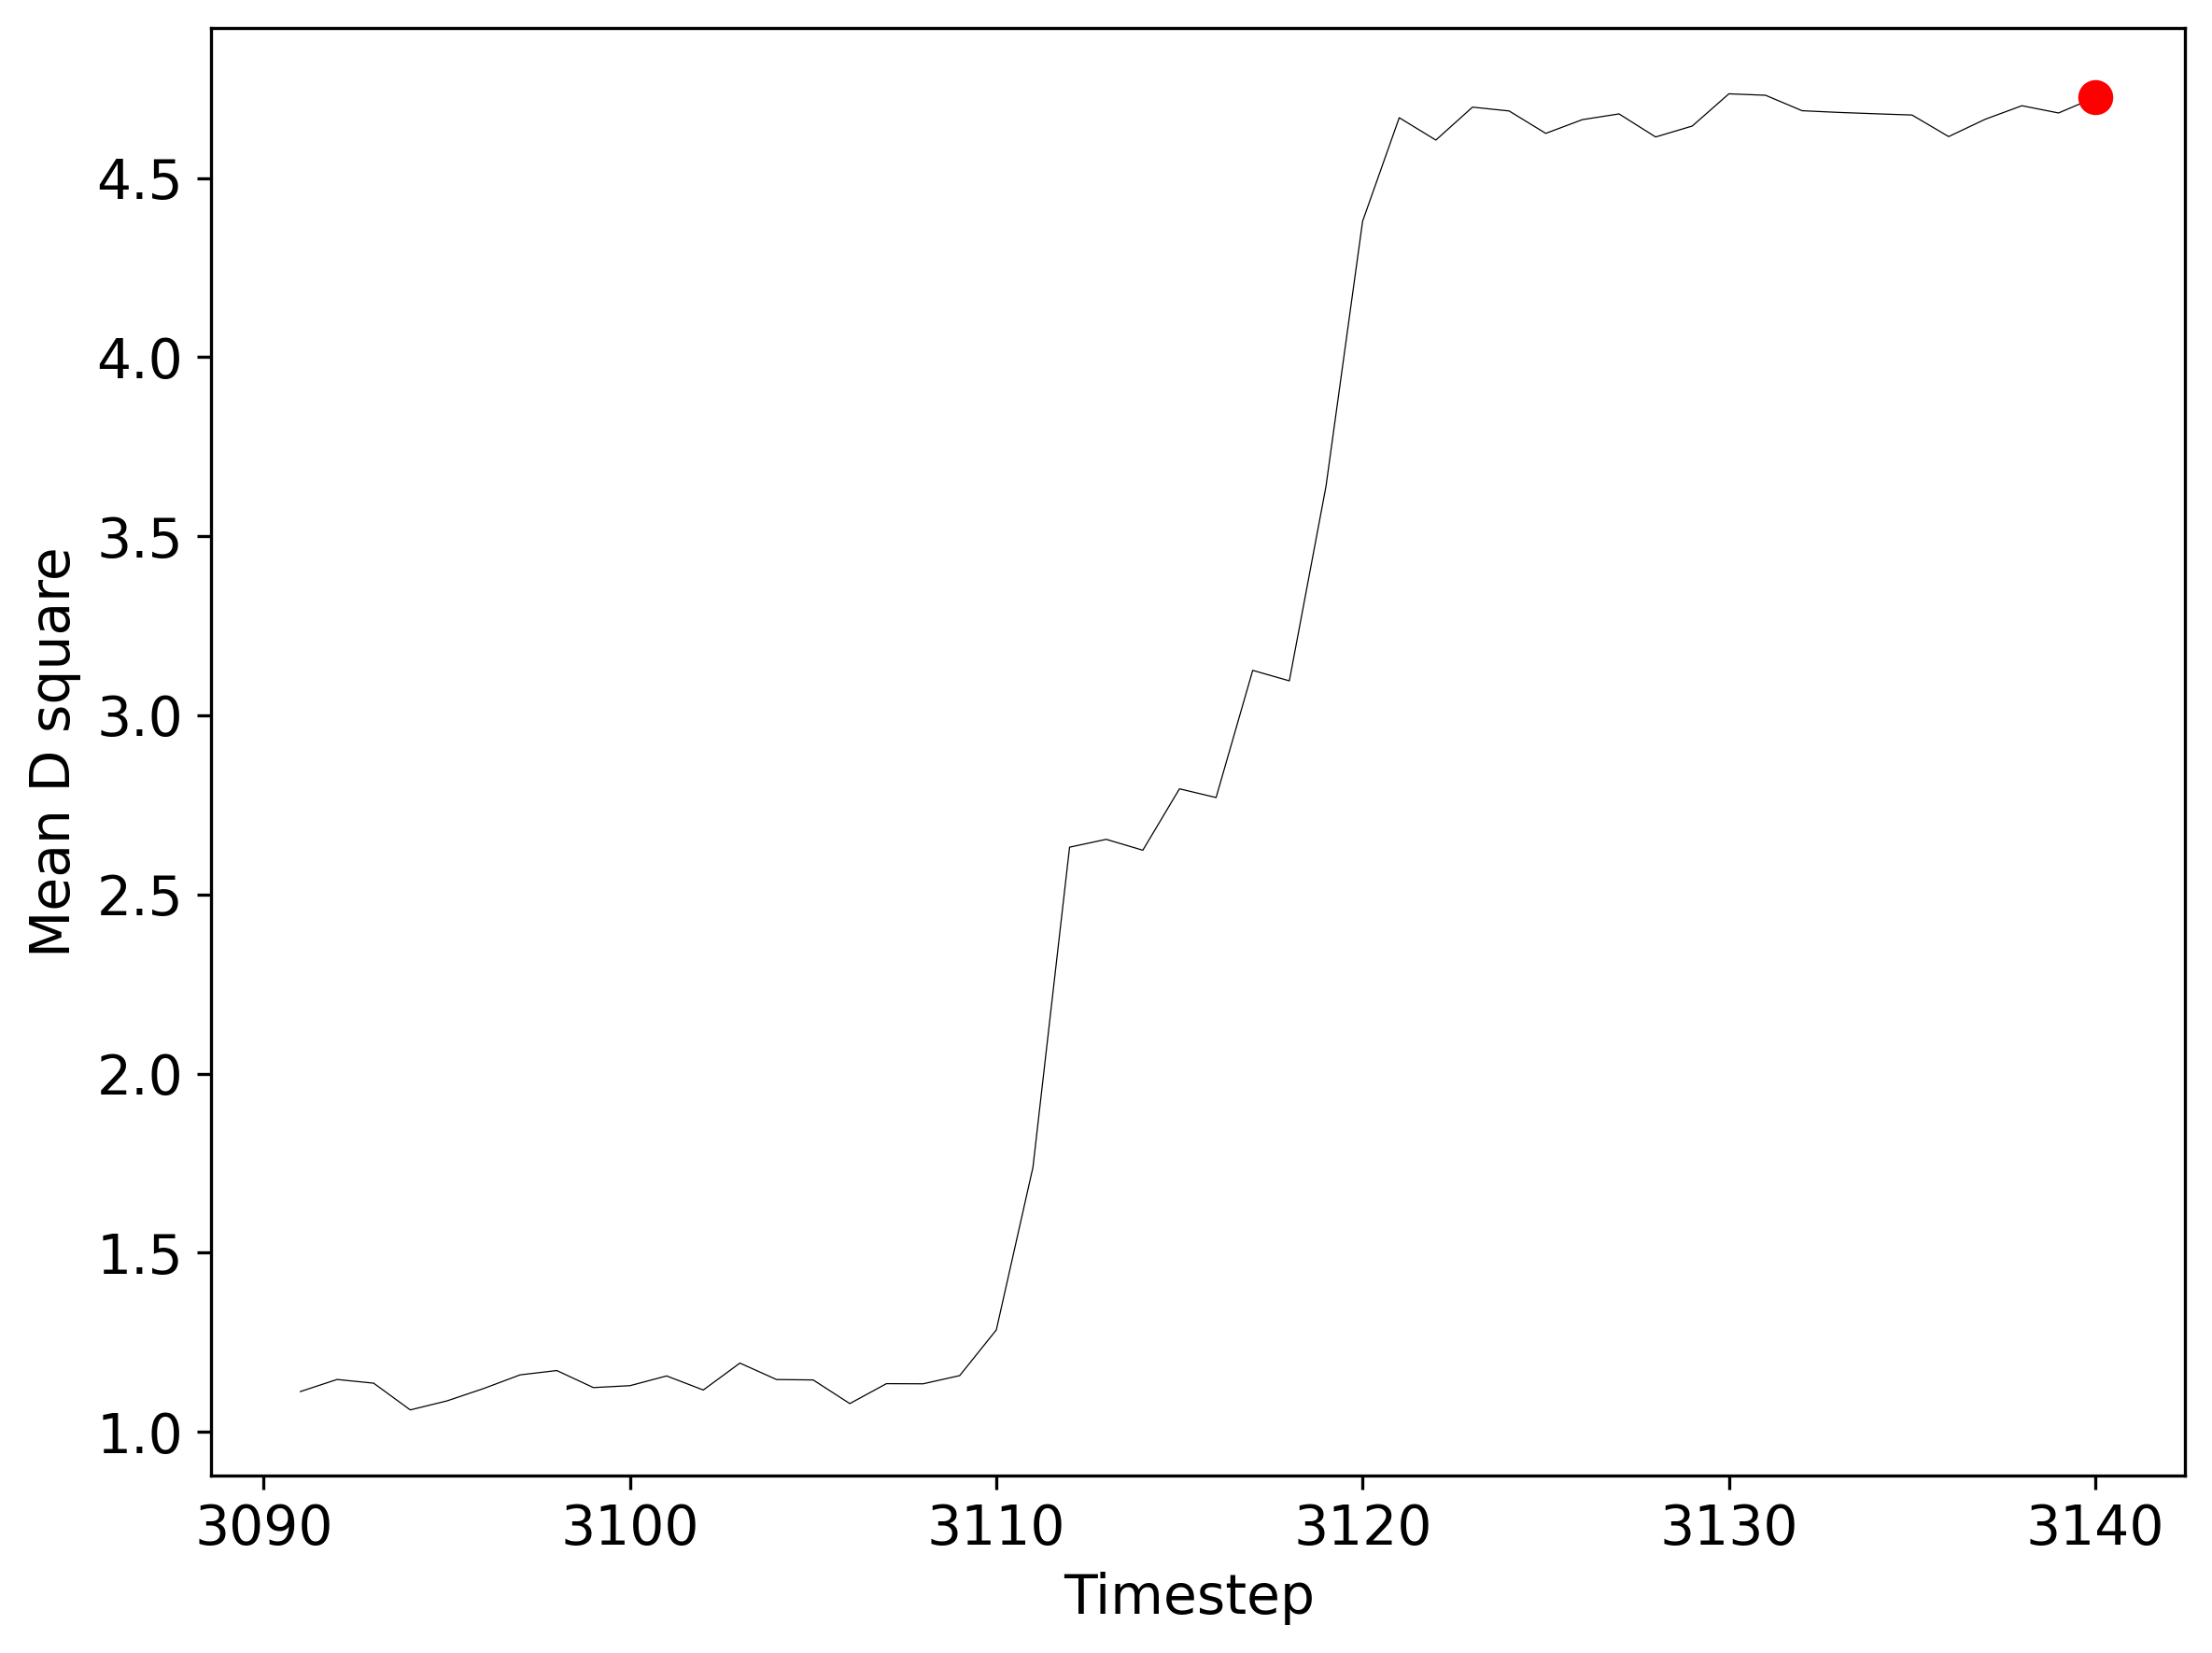

In [522]:
import numpy as np
import pandas as pd
from matplotlib import pyplot as plt
from matplotlib import animation

def update_points(num):
    '''
    更新数据点
    '''
    point_ani.set_data(x[num], y[num])
    return point_ani,

animated_x=x1[3090:3140]
animated_y=di_sqr[3090:3140]

x=animated_x
y=animated_y


fig, ax = plt.subplots(figsize=(8, 6), tight_layout=True,dpi=300)

plt.plot(x,y,lw=.3,color='k')
point_ani, = plt.plot(x[0], y[0], "ro",markersize=8)

ax.set_ylabel("Mean D square",size=14)
ax.set_xlabel("Timestep ",size=14)

plt.setp(ax.yaxis.get_majorticklabels(),size = 14)
plt.setp(ax.xaxis.get_majorticklabels(),size = 14)
ani = animation.FuncAnimation(fig, update_points, np.arange(1, len(x), 1), interval=1, blit=True)
ani.save('uncoated2_small_part_seed1.gif', writer='imagemagick', fps=4)

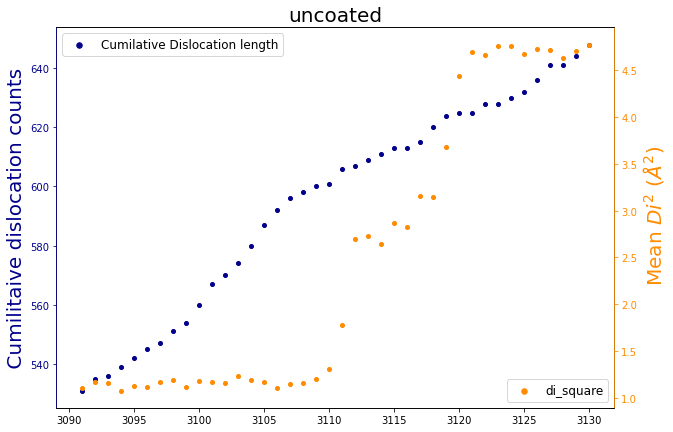

In [213]:

# x=displacement_coated1[1000:2500]
# y1=cumulative_sum[1000:2500]
# y2=di_sqr[1000:2500]

x=displacement_coated1
x1=list(np.linspace(1,4000,4000))
# x11=x1[1920:1950]
y1=cumulative_sum
y2=di_sqr_coated1


fig,ax1=plt.subplots(figsize=(10,7))
ax2=ax1.twinx()


curve1=ax1.scatter(x1[3090:3130],dis[3090:3130],label='Cumilative Dislocation length',color='darkblue',s=16)
curve2=ax2.scatter(x1[3090:3130],y2[3090:3130],label='di_square',color='darkorange',s=16)
# curve2=ax2.scatter(x1[1850:1950],y3[1850:1950],label='di_square',color='darkorange',s=16)
ax1.set_ylabel(' Cumilitaive dislocation counts ' ,fontsize=20,color='darkblue')
ax2.set_ylabel(' Mean $ Di^{2}$ $(Å^{2}) $',fontsize=20,color='darkorange')

ax1.tick_params(axis='y', colors='darkblue')
ax2.tick_params(axis='y', colors='darkorange')

ax2.spines['left'].set_color('darkblue') 
ax2.spines['right'].set_color('darkorange') 

ax1.legend(loc='upper left',fontsize=12)
ax2.legend(loc='lower right',fontsize=12)
plt.title(seed,fontsize=20)



# Plot legend.
lgnd1 = ax1.legend(loc="upper left", scatterpoints=1, fontsize=12)
lgnd1.legendHandles[0]._sizes = [30]

lgnd2 = ax2.legend(loc="lower right", scatterpoints=1, fontsize=12)
lgnd2.legendHandles[0]._sizes = [30]
# plt.xlabel('timestep')
# lgnd.legendHandles[1]._sizes = [30]

# plt.savefig('uncoated_51strain_new_very_full_part_cumulative_dislocation_vs_di_square_{}.jpg'.format(seed),dpi=300, bbox_inches='tight')
# 

In [346]:
y2=di_sqr_uncoated

In [347]:

index=[]
for i in range(0, len(y2), 50):
    if i + 50 >= len(y2):
        break  # Stop if we're on the last interval
    if y2[i+50] - y2[i] >= 0.4:
        index.append(i+50)
        print("Index:", i+50, "has an increment of 0.5 or more")
        
diffusive_strain1=[]
diffusive_strain=[]
for i in index:
    diffusive_strain.append(displacement_coated1[i])
    diffusive_strain1.append(displacement_coated1[i])
print(diffusive_strain)

Index: 3150 has an increment of 0.5 or more
[0.05895625474970354]


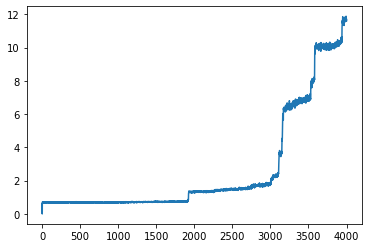

In [339]:
# di_sqr_uncoated=di_sqr
# di_sqr_coated1=di_sqr

plt.plot(di_sqr_coated1)
# plt.plot(di_sqr_coated1)
with open('extracted_disquare_coated1.txt', 'w') as f:
    for item in di_sqr_coated1:
        f.write(str(item) + '\n')

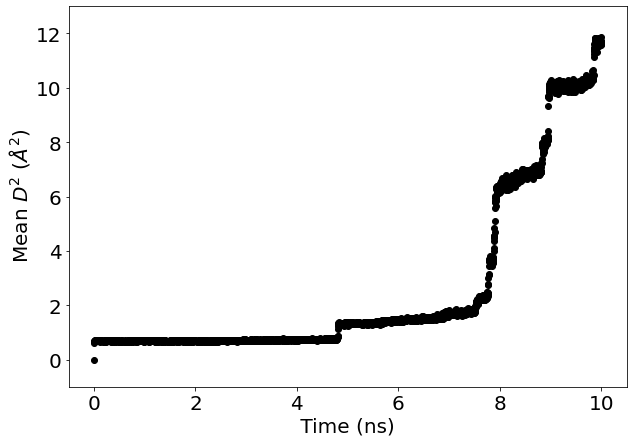

In [362]:
# fig,ax1=plt.subplots(figsize=(10,7))

range_size = 50

# Create a new figure
fig, ax = plt.subplots(figsize=(10,7))

# Plot the curve
# ax.plot(x1, y2[1:], color='red')
ax.scatter(timestep, di_sqr_coated1, color='black')

# Loop through the indices and highlight the corresponding range in green
# for i in index:
#     ax.axvspan(x1[i-range_size], x1[i], alpha=.3, color='green')

# Show the plot
ax.set_ylabel(' Mean $D^2$ ($Å^2$) ' ,fontsize=20,color='black')
ax.set_xlabel(' Time (ns) ' ,fontsize=20,color='black')
plt.ylim(-1,13)
plt.setp(ax.yaxis.get_majorticklabels(),size = 20)
plt.setp(ax.xaxis.get_majorticklabels(),size = 20)

plt.savefig('qual_coated_3{}.jpg'.format(seed),dpi=300, bbox_inches='tight')

plt.show()

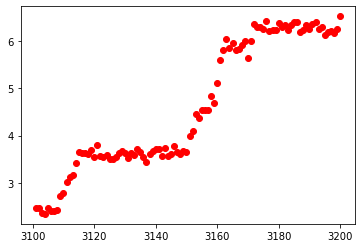

In [356]:
plt.scatter(x1[3100:3200], di_sqr_coated1[3100:3200], color='red')

In [11]:
import os
current_directory = os.getcwd()
# print(current_directory)

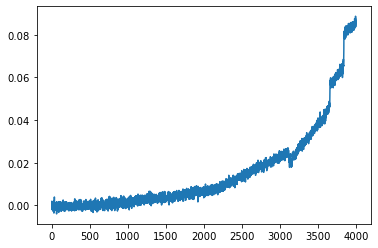

In [229]:
plt.plot(displacement_coated2)
with open('displacement_coated2.txt', 'w') as f:
    for item in displacement_coated2:
        f.write(str(item) + '\n')


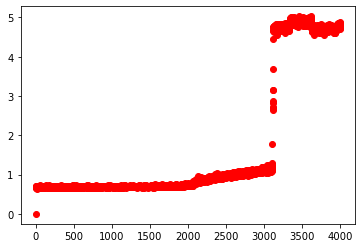

In [388]:
plt.scatter(x1, di_sqr_uncoated, color='red')

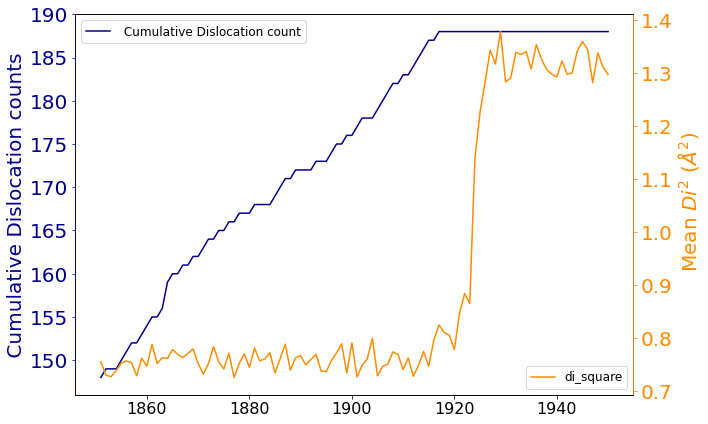

In [158]:

# x=displacement_coated1[1000:2500]
# y1=cumulative_sum[1000:2500]
# y2=di_sqr[1000:2500]

x1=list(np.linspace(1,4001,4001))
# x11=x1[1920:1950]
y1=cumulative_sum
y2=di_sqr


fig,ax1=plt.subplots(figsize=(10,7))
ax2=ax1.twinx()


curve1=ax1.plot(x1[1850:1950],cumulative_sum[1850:1950],label=' Cumulative Dislocation count',color='darkblue')
curve2=ax2.plot(x1[1850:1950],di_sqr[1850:1950],label='di_square',color='darkorange')

ax1.set_ylabel(' Cumulative Dislocation counts ' ,fontsize=20,color='darkblue')
ax2.set_ylabel(' Mean $ Di^{2}$ $(Å^{2}) $',fontsize=20,color='darkorange')


ax1.tick_params(axis='y', colors='darkblue', labelsize=20)
ax2.tick_params(axis='y', colors='darkorange',labelsize=20)



# ax1.set_yticklabels(np.arange(0, 222, 1), fontsize=20, color='blue')

# ax2.set_yticklabels(np.arange(0, 222, 1), fontsize=20, color='orange')


ax2.spines['left'].set_color('darkblue') 
ax2.spines['right'].set_color('darkorange') 

ax1.legend(loc='upper left',fontsize=20)
ax2.legend(loc='lower right',fontsize=20)
ax1.tick_params(axis='x', labelsize=16)
# plt.title(seed,fontsize=20)



# Plot legend.
lgnd1 = ax1.legend(loc="upper left", scatterpoints=1, fontsize=12)
lgnd1.legendHandles[0]._sizes = [30]

lgnd2 = ax2.legend(loc="lower right", scatterpoints=1, fontsize=12)
lgnd2.legendHandles[0]._sizes = [30]
# plt.xlabel('timestep')
# lgnd.legendHandles[1]._sizes = [30]

plt.savefig('qual12_dislocation_vs_di_square_{}.jpg'.format(seed),dpi=300, bbox_inches='tight')
